<h1><center>Credit Scoring</center></h1>

In [111]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


## EDA

In [113]:
# Load the dataset
data = pd.read_excel('Base_Final_Final.xlsx', sheet_name='Original')

In [114]:
# Take the first rows to explore the data
data.head()

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.66,156.88,24
1,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,0.00,156.88,24
2,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.55,156.88,24
3,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.48,156.88,24
4,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.41,156.88,24


In [115]:
# Describe 
data.describe()

,REGIONAL,# CARGAS,EDAD,INGRESOS,EGRESOS,AÑO_CREACION,VALOR ORI.PRESTAM,TASA,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
count,126863.000000,126700.000000,126710.000000,126863.000000,126863.000000,126863.000000,126863.000000,126863.000000,126848.000000,126863.000000,126863.000000
mean,1.497836,1.221618,42.194507,2905.702100,2044.677671,3.229547,8694.760327,21.366844,20.380611,297.650742,39.381798
std,0.653797,1.000052,13.263097,2315.537261,1980.157729,1.392030,6928.536145,1.001125,79.946904,182.267259,13.022025
min,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,500.000000,18.500000,0.000000,0.000000,5.000000
25%,1.000000,1.000000,31.000000,1305.000000,593.000000,2.000000,4000.000000,20.600000,2.610000,173.380000,26.000000
50%,1.000000,1.000000,41.000000,2181.140000,1358.000000,3.000000,6000.000000,22.170000,5.420000,249.660000,37.000000
75%,2.000000,2.000000,51.000000,3800.000000,2847.500000,4.000000,10000.000000,22.170000,14.120000,374.140000,48.000000
max,3.000000,6.000000,89.000000,60000.000000,41449.200000,5.000000,40000.000000,24.320000,4754.960000,1750.630000,78.000000


In [116]:
data.isnull().sum() 

REGIONAL                0
ESTADO CIVIL          153
# CARGAS              163
NIVEL DE  ESTUDIOS    163
TIPO DE VIVIENDA        0
EDAD                  153
SEXO                  153
INGRESOS                0
EGRESOS                 0
AÑO_CREACION            0
OCUPACION               0
TIPO DE GARANTÍA        0
TIPO DEST.              0
VALOR ORI.PRESTAM       0
TASA                    0
CALIFICAC               0
OTROS RUBROS DEUDA     15
VALOR CUOTA             0
CUOT_TOT                0
dtype: int64

<AxesSubplot: >

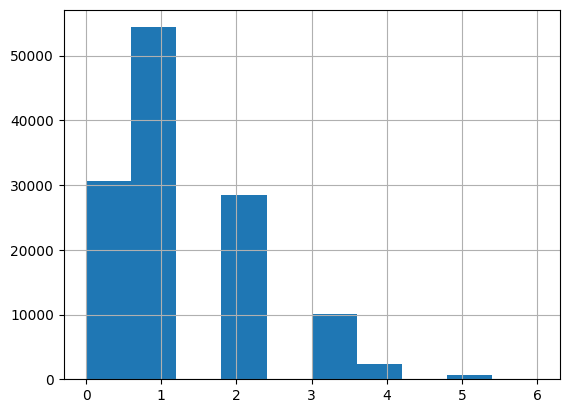

In [117]:
data['# CARGAS'].hist()

In [118]:
data['# CARGAS'].mode()[0]

1.0

In [119]:
null_vals_variables = ['ESTADO CIVIL', '# CARGAS', 'NIVEL DE  ESTUDIOS', 'EDAD', 'SEXO', 'OTROS RUBROS DEUDA']


# Replace the missing values with mode
#null_vals_variables = ['# CARGAS', 'EDAD', 'OTROS RUBROS DEUDA']
for var in null_vals_variables:
    data[var].fillna(data[var].mode()[0], inplace=True)
data.isna().sum()

REGIONAL              0
ESTADO CIVIL          0
# CARGAS              0
NIVEL DE  ESTUDIOS    0
TIPO DE VIVIENDA      0
EDAD                  0
SEXO                  0
INGRESOS              0
EGRESOS               0
AÑO_CREACION          0
OCUPACION             0
TIPO DE GARANTÍA      0
TIPO DEST.            0
VALOR ORI.PRESTAM     0
TASA                  0
CALIFICAC             0
OTROS RUBROS DEUDA    0
VALOR CUOTA           0
CUOT_TOT              0
dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  object 
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  object 
 4   TIPO DE VIVIENDA    126863 non-null  object 
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  object 
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  object 
 11  TIPO DE GARANTÍA    126863 non-null  object 
 12  TIPO DEST.          126863 non-null  object 
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

Como podemos observar hay un mal procesamiento de la variable # CARGAS esta debe ser interpretada como número entero y no como un número flotante, pero primero nos aseguraremos que los datos son correctos y realmente hayan únicamente número enteros, para ello buscaremos los únicos interpretados como número enteros

In [121]:
data['# CARGAS'].astype(int).unique()

array([2, 1, 0, 3, 5, 4, 6])

Como observamos solo hay enteros por lo que procedemos a cambiar el tipo y reasignar al dataset origen

In [122]:
data['# CARGAS'] = data['# CARGAS'].astype(int)

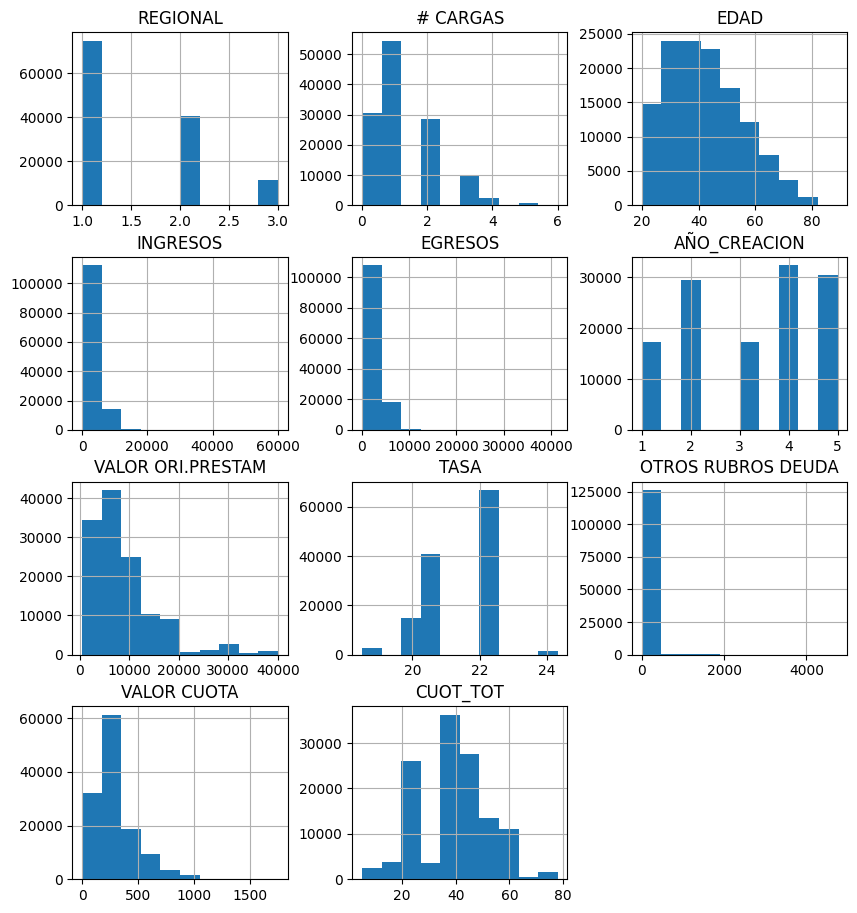

In [123]:
data.hist(grid=True, figsize=(10,11));

In [124]:
print(max(data['INGRESOS']))
print(min(data['INGRESOS']))
print(data['INGRESOS'].mean())

60000.0
0.0
2905.702100488716


In [125]:
variables = data.columns
numeric_variables = data._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numeric_variables))
printmd(f'**Variables in dataset:** {len(variables)}')
printmd(f'**Original quantitative variables:** {len(numeric_variables)}')
print(numeric_variables.to_list())
printmd(f'**Original qualitative variables:** {len(categorical_variables)}')
print(categorical_variables)


**Variables in dataset:** 19

**Original quantitative variables:** 11

['REGIONAL', '# CARGAS', 'EDAD', 'INGRESOS', 'EGRESOS', 'AÑO_CREACION', 'VALOR ORI.PRESTAM', 'TASA', 'OTROS RUBROS DEUDA', 'VALOR CUOTA', 'CUOT_TOT']


**Original qualitative variables:** 8

['OCUPACION', 'SEXO', 'TIPO DE VIVIENDA', 'TIPO DEST.', 'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS', 'ESTADO CIVIL']


#### Qualitative Variables Encoding

It is time to work with qualitative variables, we can use One Encoder or a Label Encoder, in this case study the
qualitative variables are going to be processed as ordinal variables, because most of them represent an order or hierarchy, so will use Label Encoder with previously defined labels.

In [126]:
#Label encoding for qualitative variables
encoder = ce.OrdinalEncoder(cols=['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION',
                                  'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS'],
                    return_df=True,
                       mapping=[{
                           'col': 'SEXO',
                           'mapping': {
                               'None': 0,
                               'Femenino': 0,
                               'Masculino': 1
                               }
                           },
                           {
                            'col': 'TIPO DEST.',
                            'mapping':{
                                'None': 0,
                                'AS': 0,
                                'OT': 0,
                                'IF': 1,
                                'II': 1,
                                'CT': 2,
                                'RP': 2,
                                'TE': 3,
                                'TF': 3,
                                'TL': 3,
                                'TO': 3,
                                'TP': 3,
                                'TT': 3
                            }
                           },
                           {
                            'col': 'ESTADO CIVIL',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Soltero': 0,
                                'Union Libre': 0,
                                'Casado': 1,
                                'Divorciado': 1,
                                'Viudo': 1
                                }
                           },
                           {
                            'col': 'TIPO DE VIVIENDA',
                            'mapping': {
                                'None': 0,
                                'Propia': 0,
                                'Arrendada': 1,
                                'Prestada': 1,
                                'Vive Con Familia': 1
                                }
                           },
                           {
                            'col': 'OCUPACION',
                            'mapping': {
                                'None': 0,
                                'Jubilado': 0,
                                'Acuicultor': 1,
                                'Albañil': 1,
                                'Ama De Casa': 1,
                                'Arrendador': 1,
                                'Artesano': 1,
                                'Barbero': 1,
                                'Carpintero': 1,
                                'Cerrajero ': 1,
                                'Chef / Cocinero Y Afines': 1,
                                'Comerciante': 1,
                                'Conductor / Animador': 1,
                                'Conductor Profesional': 1,
                                'Consultor Profesional': 1,
                                'Consultorias Profesionales': 1,
                                'Contratista': 1,
                                'Cosmetóloga': 1,
                                'Doctor / A': 1,
                                'Electricista': 1,
                                'Estudiante': 1,
                                'Fabricación De Otros Productos De Metal Ncp': 1,
                                'Fabricación de Productos Lácteos': 1,
                                'Faenador / Carnicero': 1,
                                'Ganadero': 1,
                                'Hojalatero': 1,
                                'Horticultor': 1,
                                'Horticultor De Árbol': 1,
                                'Independiente': 1,
                                'Instructor / Capacitador': 1,
                                'Jefe de Área': 1,
                                'Masajista': 1,
                                'Mecánico': 1,
                                'Músico': 1,
                                'Nutricionista': 1,
                                'Panadero / Pastelero': 1,
                                'Peluquero': 1,
                                'Pescador Y Recolector De Productos Del Mar': 1,
                                'Plomero': 1,
                                'Productor De Huevos': 1,
                                'Sastre / Costurera': 1,
                                'Soldador': 1,
                                'Técnico de Audio': 1,
                                'Terapista Y Afines': 1,
                                'Tornero': 1,
                                'Veterinario': 1,
                                'Zapatero': 1,
                                'Analista / Afines': 2,
                                'Asesor Inmobiliario': 2,
                                'Asistentes / Auxiliares /Ayudantes Y Afines': 2,
                                'Atencion Al Cliente': 2,
                                'Bombero': 2,
                                'Cajero': 2,
                                'Conserje / Portero': 2,
                                'Contador': 2,
                                'Despachador / Perchero': 2,
                                'Digitador': 2,
                                'Diseñador Gráfico': 2,
                                'Docente': 2,
                                'Ejecutivo / Afines': 2,
                                'Embasadores / Conservas Y Afines': 2,
                                'Empacador / Cargador': 2,
                                'Empleada Doméstica': 2,
                                'Empleado Privado': 2,
                                'Empleado Público': 2,
                                'Enfermero (A)': 2,
                                'Farmaceuticos  Y Hospitalarios': 2,
                                'Floristería': 2,
                                'Fotografo': 2,
                                'Gerente General': 2,
                                'Guardia de Seguridad': 2,
                                'Jardinero': 2,
                                'Mensajero / Repartidor': 2,
                                'Militar': 2,
                                'Motorista': 2,
                                'Obreros': 2,
                                'Operador De Maquinas De Cultivo / Agricolas': 2,
                                'Otras Actividades De Servicios': 2,
                                'Paramédico': 2,
                                'Periodista': 2,
                                'Policia Nacional': 2,
                                'Publicista': 2,
                                'Quimico Farmaceutico': 2,
                                'Recepcionista / Anfitriona': 2,
                                'Salonero / Barman / Posillero / Similares': 2,
                                'Secretaria / Oficinista': 2,
                                'Subgerencias Y Afines': 2,
                                'Supervisor': 2,
                                'Técnico': 2,
                                'Vendedor / A': 2
                                }
                           },
                           {
                            'col': 'TIPO DE GARANTÍA',
                            'mapping': {
                                'None': 0,
                                'Hipoteca': 0,
                                'Pagaré': 1
                                }
                           },
                           {
                            'col': 'CALIFICAC',
                            'mapping': {
                                'None': 0,
                                'A1': 0,
                                'A2': 1,
                                'A3': 2,
                                'B1': 3,
                                'B2': 4,
                                'C1': 5,
                                'C2': 6,
                                'D': 7,
                                'E': 8,
                                }
                           },
                           {
                            'col': 'NIVEL DE  ESTUDIOS',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Primaria': 0,
                                'Sin Estudios': 0,
                                'Secundaria': 1,
                                'Técnico': 1,
                                'Postgrado': 2,
                                'Universitaria': 2
                                }
                           },
                       ])

In [127]:
# Encode qualitative variables with defined labels
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA']])
encoded_qualitative_variables = encoder.fit_transform(data[['SEXO', 'TIPO DEST.', 
                                                            'ESTADO CIVIL', 'TIPO DE VIVIENDA',
                                                            'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 
                                                            'NIVEL DE  ESTUDIOS']])
print(encoded_qualitative_variables)

             SEXO TIPO DEST. ESTADO CIVIL  TIPO DE VIVIENDA  \
0        Femenino         CT       Casado  Vive Con Familia   
1        Femenino         CT       Casado  Vive Con Familia   
2        Femenino         CT       Casado  Vive Con Familia   
3        Femenino         CT       Casado  Vive Con Familia   
4        Femenino         CT       Casado  Vive Con Familia   
...           ...        ...          ...               ...   
126858  Masculino         TE       Casado            Propia   
126859  Masculino         TE       Casado            Propia   
126860  Masculino         TE       Casado            Propia   
126861  Masculino         TE       Casado            Propia   
126862  Masculino         TE       Casado            Propia   

                    OCUPACION TIPO DE GARANTÍA  
0                    Artesano           Pagaré  
1                    Artesano           Pagaré  
2                    Artesano           Pagaré  
3                 Ama De Casa           Pagaré 

In [128]:
test_range_min = 100
test_range_max = 115
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION']][test_range_min:test_range_max])
print(encoded_qualitative_variables[:][test_range_min:test_range_max])

         SEXO TIPO DEST. ESTADO CIVIL TIPO DE VIVIENDA  \
100  Femenino         TE        Viudo           Propia   
101  Femenino         TE        Viudo           Propia   
102  Femenino         TE        Viudo           Propia   
103  Femenino         TE        Viudo           Propia   
104  Femenino         TE        Viudo           Propia   
105  Femenino         TE        Viudo           Propia   
106  Femenino         TE        Viudo           Propia   
107  Femenino         TO      Soltero           Propia   
108  Femenino         TO      Soltero           Propia   
109  Femenino         TO      Soltero           Propia   
110  Femenino         TO      Soltero           Propia   
111  Femenino         TO      Soltero           Propia   
112  Femenino         TO      Soltero           Propia   
113  Femenino         TO      Soltero           Propia   
114  Femenino         TO      Soltero           Propia   

                                       OCUPACION  
100                 

## Data cleaning

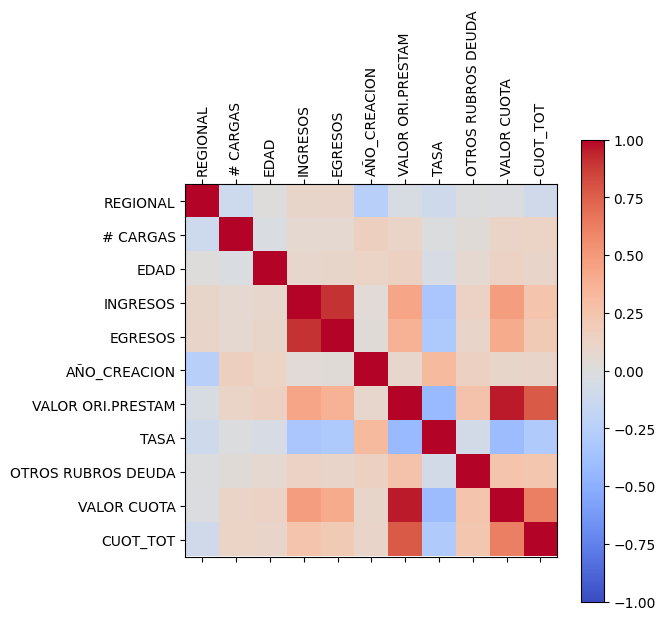

In [129]:
subdata = data[numeric_variables]
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

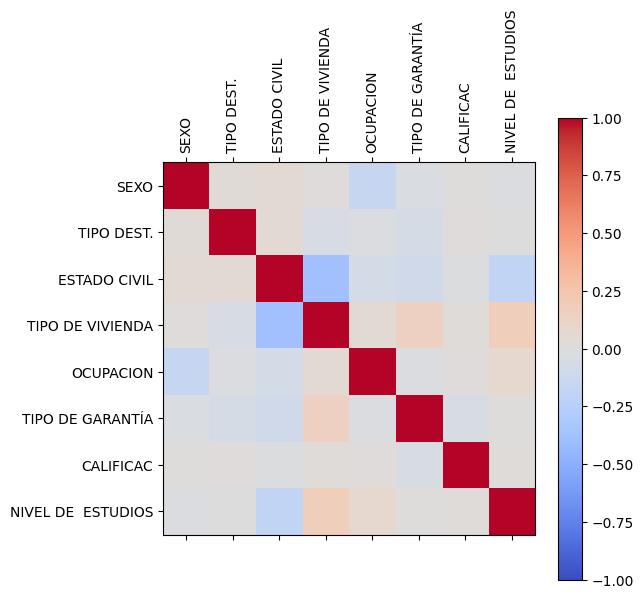

In [130]:
subdata = encoded_qualitative_variables
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [131]:
encoded_qualitative_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SEXO                126863 non-null  int64  
 1   TIPO DEST.          126863 non-null  int64  
 2   ESTADO CIVIL        126863 non-null  int64  
 3   TIPO DE VIVIENDA    126863 non-null  int64  
 4   OCUPACION           126863 non-null  float64
 5   TIPO DE GARANTÍA    126863 non-null  int64  
 6   CALIFICAC           126863 non-null  int64  
 7   NIVEL DE  ESTUDIOS  126863 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 7.7 MB


#### Grouping numeric values by range



In [132]:
# Age encoding
edad = data['EDAD'].copy()

edad[ edad<=35 ] = 0
edad[ (edad>35) & (edad<55) ] = 1
edad[ edad>=55 ] = 2

print(edad)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    1.0
126859    1.0
126860    1.0
126861    1.0
126862    1.0
Name: EDAD, Length: 126863, dtype: float64


In [133]:
# Regional encoding
regional = data['REGIONAL'].copy()
regional[ regional == 1 ] = 0
regional[ regional == 2 ] = 1
regional[ regional == 3 ] = 2
regional

0         0
1         0
2         0
3         0
4         0
         ..
126858    1
126859    1
126860    1
126861    1
126862    1
Name: REGIONAL, Length: 126863, dtype: int64

In [134]:
# CARGAS encoding
cargas = data['# CARGAS'].copy()
cargas[ cargas == 'NA' ] = 0
cargas[ cargas == 0 ] = 0
cargas[ cargas == 1 ] = 1
cargas[ cargas == 2 ] = 1
cargas[ cargas == 3 ] = 1
cargas[ cargas == 4 ] = 1
cargas[ cargas == 5 ] = 1
cargas[ cargas == 6 ] = 1
print(cargas[37:45])

37    0
38    0
39    0
40    1
41    1
42    1
43    1
44    1
Name: # CARGAS, dtype: int64


In [135]:
# Ingresos encoding
ingresos = data['INGRESOS'].copy()
ingresos[ ingresos < 15000 ] = 0
ingresos[ (ingresos >= 15000) & (ingresos < 30000) ] = 1
ingresos[ (ingresos >= 30000) & (ingresos < 45000) ] = 2
ingresos[ (ingresos >= 45000) & (ingresos <= 60000) ] = 3
ingresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: INGRESOS, Length: 126863, dtype: float64

In [136]:
# Egresos encoding
egresos = data['EGRESOS'].copy()
egresos[ egresos < 10500 ] = 0
egresos[ (egresos >= 10500) & (egresos < 21000) ] = 1
egresos[ (egresos >= 21000) & (egresos < 31500) ] = 2
egresos[ (egresos >= 31500) & (egresos <= 42000) ] = 3
egresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: EGRESOS, Length: 126863, dtype: float64

<AxesSubplot: >

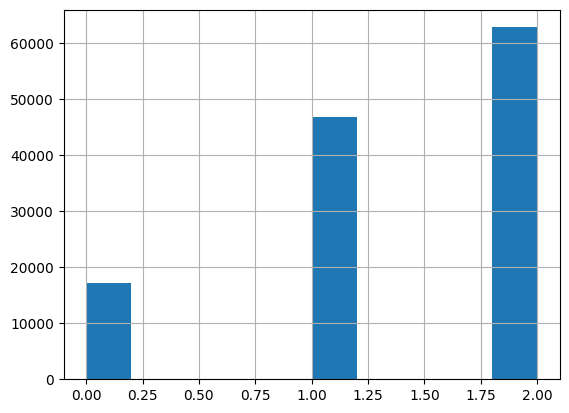

In [137]:
# Año creación encoding

creacion = data['AÑO_CREACION'].copy()
creacion[ creacion == 1 ] = 0
creacion[ (creacion >= 2) & (creacion <= 3)] = 1
creacion[ (creacion >= 4) & (creacion <= 5)] = 2
creacion.hist()

<AxesSubplot: >

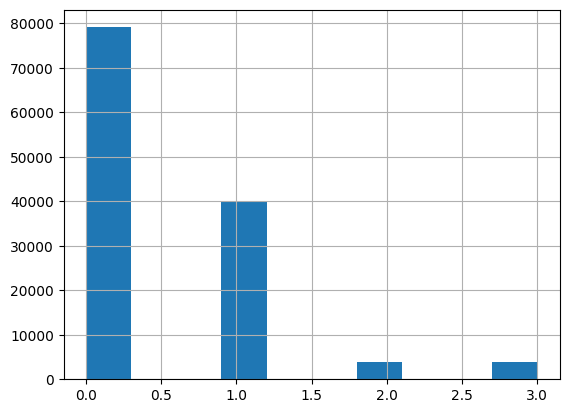

In [138]:
# Valor orig. Prestamo encoding
valor_ori_prestamo = data['VALOR ORI.PRESTAM'].copy()
valor_ori_prestamo[ valor_ori_prestamo < 10000 ] = 0
valor_ori_prestamo[ (valor_ori_prestamo >= 10000) & (valor_ori_prestamo < 20000) ] = 1
valor_ori_prestamo[ (valor_ori_prestamo >= 20000) & (valor_ori_prestamo < 30000) ] = 2
valor_ori_prestamo[ (valor_ori_prestamo >= 30000) & (valor_ori_prestamo <= 40000) ] = 3
valor_ori_prestamo.hist()

<AxesSubplot: >

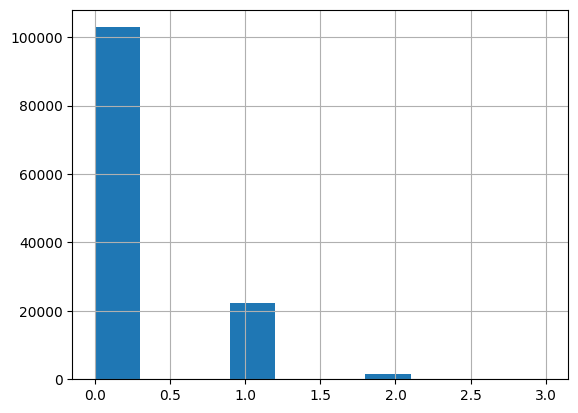

In [29]:
# Valor cuota encoding
valor_cuota = data['VALOR CUOTA'].copy()
valor_cuota[ valor_cuota < 450 ] = 0
valor_cuota[ (valor_cuota >= 450) & (valor_cuota < 900) ] = 1
valor_cuota[ (valor_cuota >= 900) & (valor_cuota < 1350) ] = 2
valor_cuota[ (valor_cuota >= 1350) & (valor_cuota <= 1800) ] = 3
valor_cuota.hist()

<AxesSubplot: >

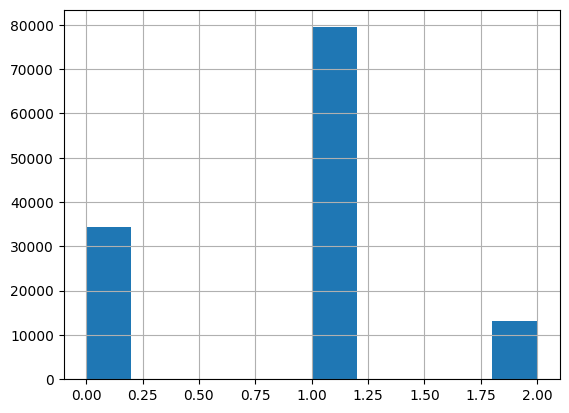

In [139]:
# CUOT_TOT encoding

cuota_total = data['CUOT_TOT'].copy()
cuota_total[ cuota_total < 30 ] = 0
cuota_total[ (cuota_total >= 30) & (cuota_total < 60) ] = 1
cuota_total[ (cuota_total >= 60) & (cuota_total <= 90) ] = 2
cuota_total.hist()

<AxesSubplot: >

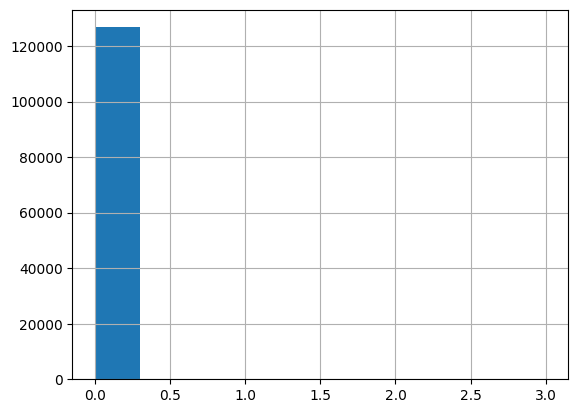

In [140]:
# OTROS RUBROS DEUDA encoding
otros_rubros = data['OTROS RUBROS DEUDA'].copy()
otros_rubros[ otros_rubros < 1250 ] = 0
otros_rubros[ (otros_rubros >= 1250) & (otros_rubros < 2500) ] = 1
otros_rubros[ (otros_rubros >= 2500) & (otros_rubros < 3750) ] = 2
otros_rubros[ (otros_rubros >= 3750) & (otros_rubros <= 5000) ] = 3
otros_rubros.hist()

<AxesSubplot: >

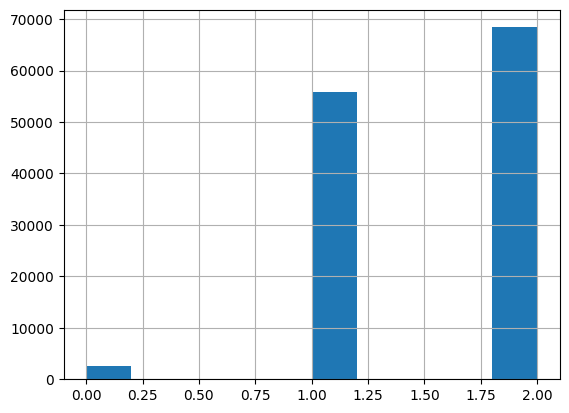

In [141]:
# TASA encoding
tasa = data['TASA'].copy()
tasa[ tasa == 18.50 ] = 0
tasa[ tasa == 19.00 ] = 0
tasa[ tasa == 20.06 ] = 1
tasa[ tasa == 20.60 ] = 1
tasa[ tasa == 21.00 ] = 1
tasa[ tasa == 22.17 ] = 2
tasa[ tasa == 24.32 ] = 2
tasa.hist()

In [142]:
# Replace encoded variables to create the encoded dataset,


# Replace qualitative variables
encoded_dataset = data.copy()
encoded_dataset['SEXO'] = encoded_qualitative_variables['SEXO'] #
encoded_dataset['TIPO DEST.'] = encoded_qualitative_variables['TIPO DEST.'] #
encoded_dataset['ESTADO CIVIL'] = encoded_qualitative_variables['ESTADO CIVIL'] #
encoded_dataset['TIPO DE VIVIENDA'] = encoded_qualitative_variables['TIPO DE VIVIENDA'] #
encoded_dataset['OCUPACION'] = encoded_qualitative_variables['OCUPACION'] #
encoded_dataset['TIPO DE GARANTÍA'] = encoded_qualitative_variables['TIPO DE GARANTÍA'] #
encoded_dataset['CALIFICAC'] = encoded_qualitative_variables['CALIFICAC'] #
encoded_dataset['NIVEL DE  ESTUDIOS'] = encoded_qualitative_variables['NIVEL DE  ESTUDIOS'] #

# Replace gruped numeric values
encoded_dataset['EDAD'] = edad #
encoded_dataset['REGIONAL'] = regional #
encoded_dataset['# CARGAS'] = cargas #
encoded_dataset['INGRESOS'] = ingresos #
encoded_dataset['EGRESOS'] = egresos #
encoded_dataset['AÑO_CREACION'] = creacion #
encoded_dataset['VALOR ORI.PRESTAM'] = valor_ori_prestamo #
encoded_dataset['VALOR CUOTA'] = valor_cuota#
encoded_dataset['CUOT_TOT'] = cuota_total #
encoded_dataset['OTROS RUBROS DEUDA'] = otros_rubros #
encoded_dataset['TASA'] = tasa

encoded_dataset

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
1,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
2,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
3,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
4,0,1,1,1,1,0.0,0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126858,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126859,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126860,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126861,1,1,1,1,0,1.0,1,0.0,0.0,1,1.0,1,3,1.0,1.0,1,0.0,0.0,1


In [143]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

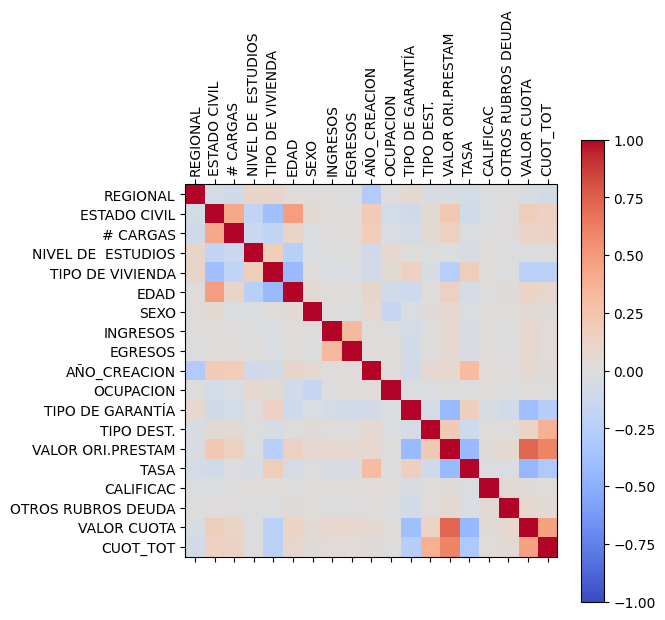

In [144]:
# See correlation of variables after encoding and procesing
subdata = encoded_dataset
corr = subdata.corr()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [145]:
# vif
X = encoded_dataset

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature        VIF
0             REGIONAL   1.766295
1         ESTADO CIVIL   4.025793
2             # CARGAS   5.118550
3   NIVEL DE  ESTUDIOS   1.963016
4     TIPO DE VIVIENDA   3.073424
5                 EDAD   3.335348
6                 SEXO   2.252896
7             INGRESOS   1.126645
8              EGRESOS   1.129840
9         AÑO_CREACION   6.335668
10           OCUPACION   7.589228
11    TIPO DE GARANTÍA  23.906480
12          TIPO DEST.  24.313813
13   VALOR ORI.PRESTAM   3.983307
14                TASA  12.194043
15           CALIFICAC   1.082089
16  OTROS RUBROS DEUDA   1.011786
17         VALOR CUOTA   2.709377
18            CUOT_TOT   5.403744


In [146]:
# Drop highly correlated variable

# detectada en correlación de pearson
encoded_dataset.drop('VALOR CUOTA', axis=1, inplace=True)

# detectado con vif
encoded_dataset.drop('TIPO DE GARANTÍA', axis=1, inplace=True)

In [147]:
# Set variables as int


#encoded_dataset['TASA'] = encoded_dataset['TASA'].astype(float)
#encoded_dataset['VALOR ORI.PRESTAM'] = encoded_dataset['VALOR ORI.PRESTAM'].astype(float)

Al finalizar todo el proceso podemos ver como tenemos un dataset con todas las variables correctamente categorizadas, todas en formato numérico y sin valores faltantes, con esto tenemos nuestro dataset listo para poder continuar con el entrenamiento

In [148]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  CALIFICAC           126863 non-null  int64  
 15  OTROS RUBROS DEUDA  126863 non-nul

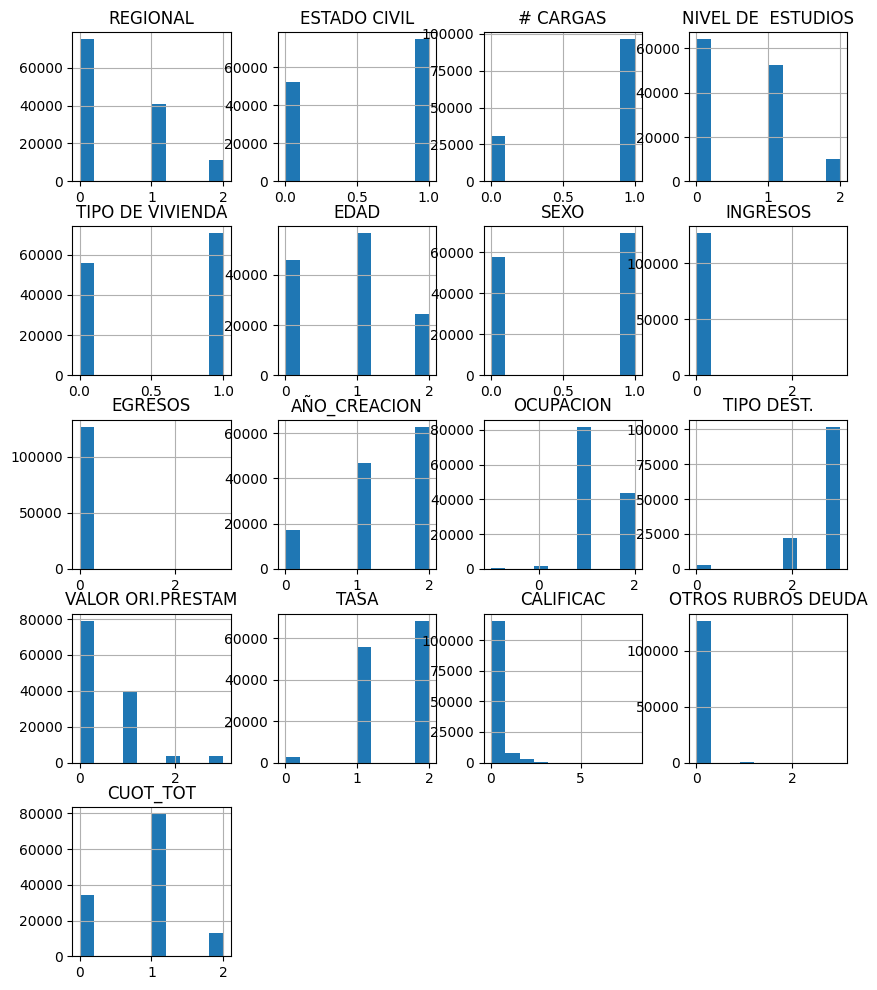

In [149]:
encoded_dataset.hist(grid=True, figsize=(10,12));

In [150]:
# Para poder separar en data de entrenamiento y testeo es necesario que acomodemos la variable objetivo 'CALIFICAC'
temp_calific = encoded_dataset.pop('CALIFICAC')
encoded_dataset.insert(loc=16, column = 'CALIFICAC', value=temp_calific)
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  int64  
 2   # CARGAS            126863 non-null  int64  
 3   NIVEL DE  ESTUDIOS  126863 non-null  int64  
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  int64  
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DEST.          126863 non-null  int64  
 12  VALOR ORI.PRESTAM   126863 non-null  float64
 13  TASA                126863 non-null  float64
 14  OTROS RUBROS DEUDA  126863 non-null  float64
 15  CUOT_TOT            126863 non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043838 entries, 0 to 1043837
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   REGIONAL            1043838 non-null  int64  
 1   ESTADO CIVIL        1043838 non-null  int64  
 2   # CARGAS            1043838 non-null  int64  
 3   NIVEL DE  ESTUDIOS  1043838 non-null  int64  
 4   TIPO DE VIVIENDA    1043838 non-null  int64  
 5   EDAD                1043838 non-null  float64
 6   SEXO                1043838 non-null  int64  
 7   INGRESOS            1043838 non-null  float64
 8   EGRESOS             1043838 non-null  float64
 9   AÑO_CREACION        1043838 non-null  int64  
 10  OCUPACION           1043838 non-null  float64
 11  TIPO DEST.          1043838 non-null  int64  
 12  VALOR ORI.PRESTAM   1043838 non-null  float64
 13  TASA                1043838 non-null  float64
 14  OTROS RUBROS DEUDA  1043838 non-null  float64
 15  CUOT_TOT       

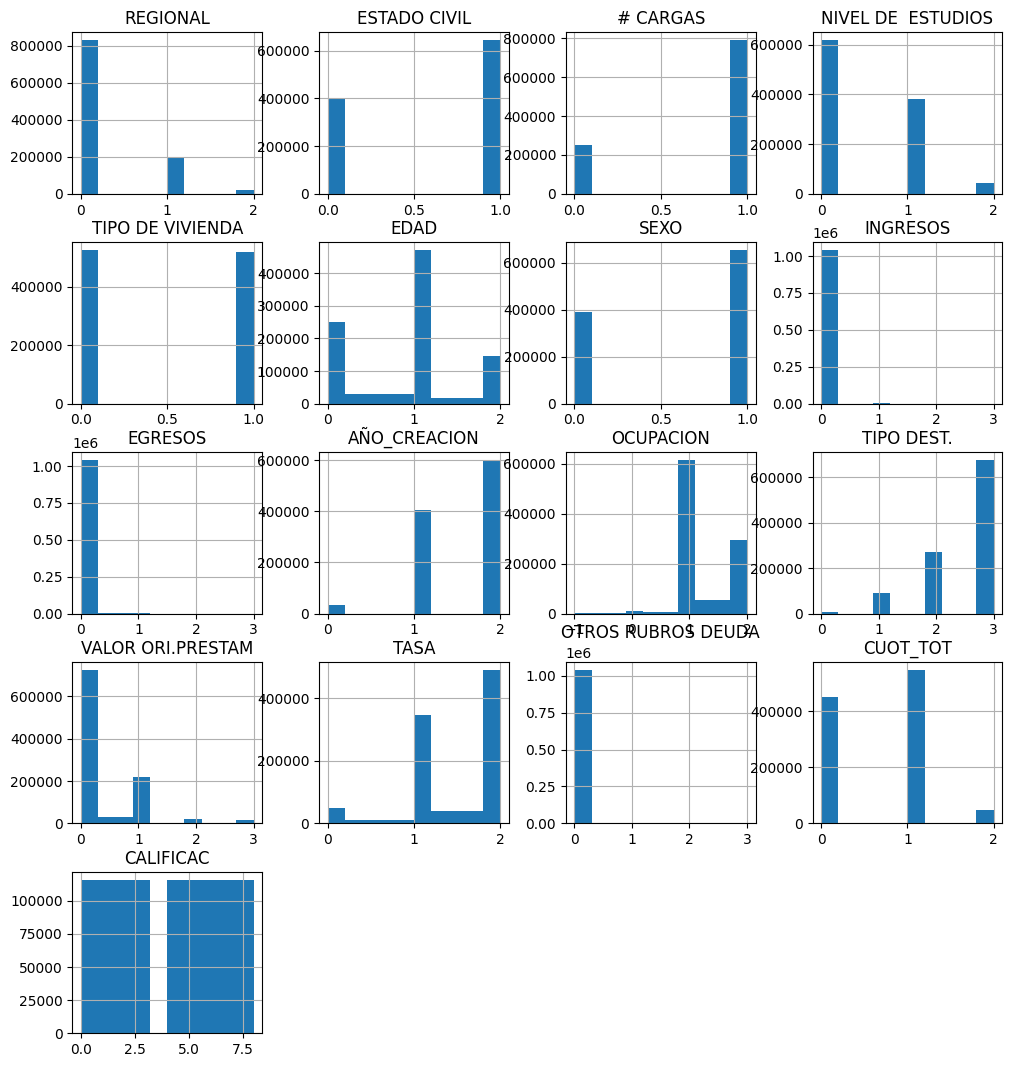

In [151]:
sm = SMOTE(random_state = 2)
x_values = encoded_dataset.iloc[:,0:16]
y_values = encoded_dataset.iloc[:,16]
x_balanced, y_balanced = sm.fit_resample(x_values, y_values)
balanced_dataset = x_balanced.copy()
balanced_dataset['CALIFICAC'] = y_balanced.copy()
balanced_dataset.info()
balanced_dataset.hist(grid=True, figsize=(12,13));

In [152]:
# Split train and test data

train,test=train_test_split(balanced_dataset, train_size=0.8, random_state = 1)
# Tomamos valores X e Y para entrenamiento
x_train = train.values[:,0:16]
y_train = train.values[:,16]
# Tomamos valores X e Y para testing
x_test = test.values[:,0:16]
y_test = test.values[:,16]

print(len(y_train))
len(y_test)

835070


208768

## ANN Modeling

En esta sección se modela y realiza pruebas manuales para determinar una arquitectura base de la red neuronal que se comporte de manera adecuada y coherente para nuestros datos, al ya tener buenos resultados se procederá a realizar la optimización de los hiperparámetros de la red neuronal

In [155]:
# Create model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='selu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64,activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256,activation='tanh'))
# model.add(Dense(1,activation='sigmoid')) # for binary clasification
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
 
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 16)                272       
                                                                 
 dense_134 (Dense)           (None, 8)                 136       
                                                                 
 dense_135 (Dense)           (None, 16)                144       
                                                                 
 dense_136 (Dense)           (None, 32)                544       
                                                                 
 dense_137 (Dense)           (None, 64)                2112      
                                                                 
 dense_138 (Dense)           (None, 128)               8320      
                                                                 
 dense_139 (Dense)           (None, 256)             

In [156]:
# Train model
from keras.utils import np_utils

epochs = 50

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50
26096/26096 [==============================] - 19s 697us/step - loss: 0.7773 - accuracy: 0.6739
Epoch 2/50
26096/26096 [==============================] - 18s 686us/step - loss: 0.6114 - accuracy: 0.7400
Epoch 3/50
26096/26096 [==============================] - 18s 690us/step - loss: 0.5761 - accuracy: 0.7571
Epoch 4/50
26096/26096 [==============================] - 18s 688us/step - loss: 0.5667 - accuracy: 0.7623
Epoch 5/50
26096/26096 [==============================] - 18s 681us/step - loss: 0.5643 - accuracy: 0.7635
Epoch 6/50
26096/26096 [==============================] - 18s 696us/step - loss: 0.5642 - accuracy: 0.7633
Epoch 7/50
26096/26096 [==============================] - 18s 685us/step - loss: 0.5642 - accuracy: 0.7627
Epoch 8/50
26096/26096 [==============================] - 18s 693us/step - loss: 0.5629 - accuracy: 0.7638
Epoch 9/50
26096/26096 [==============================] - 18s 690us/step - loss: 0.5619 - accuracy: 0.7646
Epoch 10/50
26096/26096 [============

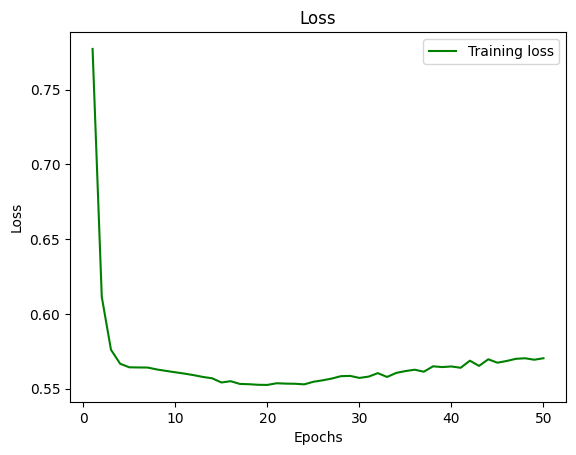

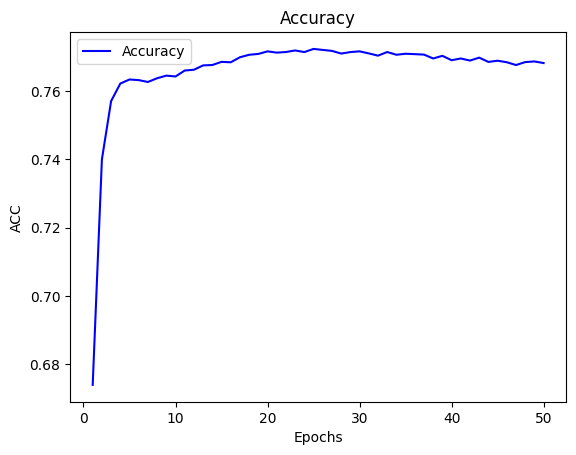

In [157]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

In [158]:
# Predictions and model evaluation

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

6524/6524 [==============================] - 3s 443us/step - loss: 0.5704 - accuracy: 0.7685
Accuracy con test: 
accuracy: 76.85%


In [159]:
y_pred_test

y_classes = y_pred_test.argmax(axis=-1)
y_classes
print(y_classes)
print(len(y_classes))

[6 3 8 ... 2 7 7]
208768


En caso de requerir ver las probabilidades asignadas a cada clase podemos observar el conjunto y_pred_test, para asignar un solo valor a una clase tomamos aquel que tenga una probabilidad mayor, a continuación se realiza el ejemplo para la primera observación.

In [161]:
print('Probabilidades para la observación 0', y_pred_test[0])

Probabilidades para la observación 0 [3.3409006e-04 1.4874496e-04 3.7292909e-04 1.2988622e-04 1.6374669e-06
 7.2309391e-05 9.8634297e-01 9.7181997e-05 1.2500344e-02]


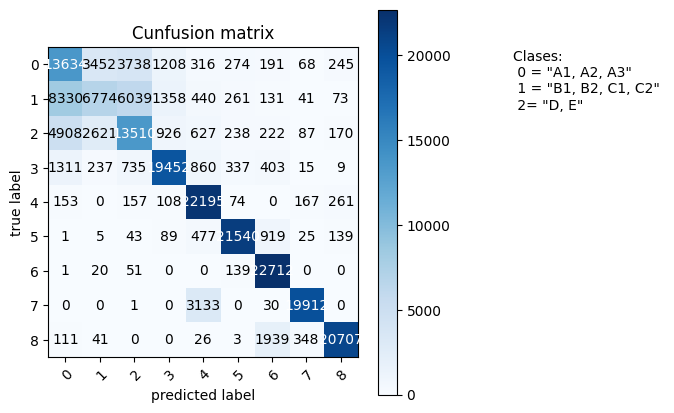

In [162]:
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2" \n 2= "D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()


## ANN optimization

In [163]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [165]:
def create_model(init_mode='uniform', optimizer='adam'):
    # define model
    model = Sequential()
    model.add(Dense(16, input_dim=16, activation='selu', kernel_initializer=init_mode))
    model.add(Dense(8, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(16,activation='tanh', kernel_initializer=init_mode))
    model.add(Dense(32, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(64,activation='tanh', kernel_initializer=init_mode))
    model.add(Dense(128, activation='relu', kernel_initializer=init_mode))
    model.add(Dense(256,activation='tanh', kernel_initializer=init_mode))
    model.add(Dense(9, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    return model

In [166]:
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 15

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)

# define the grid search parameters

# init mode for initial neurons weight
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 
             'he_normal', 'he_uniform']

# optimizers
optimizer = ['rmsprop','adam']

param_grid = dict(init_mode=init_mode, optimizer=optimizer)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

/var/folders/vk/jvp91hqs0_b948m658jpp7680000gn/T/ipykernel_28014/467923242.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,
2023-05-01 18:30:18.319571: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-01 18:30:18.319613: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-01 18:30:18.319634: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-01 18:30:18.319643: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-01 18:30:18.319572: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-01 18:30:18.319648: W tensorflow/tsl/platform/profi

Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
Epoch 1/15
4350/4350 [==============================] - 21s 4ms/step - loss: 2.1974 - accuracy: 0.1115
Epoch 2/15
4350/4350 [==============================] - 21s 5ms/step - loss: 2.1974 - accuracy: 0.1112
Epoch 2/15
4350/4350 [==============================] - 21s 4ms/step - loss: 0.8713 - accuracy: 0.6428
Epoch 2/15
4350/4350 [==============================] - 21s 4ms/step - loss: 2.1975 - accuracy: 0.1113
Epoch 2/15
4350/4350 [==============================] - 21s 4ms/step - loss: 1.6593 - accuracy: 0.3545
Epoch 2/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.8815 - accuracy: 0.6366
Epoch 2/15
4350/4350 [==============================] - 21s 5ms/step - loss: 1.6141 - accuracy: 0.3787
Epoch 2/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1104
Epoch 2/15
4350/4350 [==============================] - 20s 5ms/step - loss: 2.1974 - accuracy: 0.1

4350/4350 [==============================] - 21s 5ms/step - loss: 0.4864 - accuracy: 0.7951
Epoch 10/15
4350/4350 [==============================] - 21s 5ms/step - loss: 2.1974 - accuracy: 0.1105
Epoch 10/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.5787 - accuracy: 0.7532
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.4860 - accuracy: 0.7958
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 2.1974 - accuracy: 0.1105
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.5969 - accuracy: 0.7487
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.4810 - accuracy: 0.7980
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 2.1974 - accuracy: 0.1108
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 2.1974 - accuracy: 0.1105
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss

4350/4350 [==============================] - 25s 5ms/step - loss: 1.4034 - accuracy: 0.4517
Epoch 2/15
4350/4350 [==============================] - 25s 5ms/step - loss: 1.3640 - accuracy: 0.4679
Epoch 2/15
4350/4350 [==============================] - 25s 5ms/step - loss: 1.4532 - accuracy: 0.4244
Epoch 2/15
4350/4350 [==============================] - 20s 5ms/step - loss: 0.7445 - accuracy: 0.6821
Epoch 3/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.6750 - accuracy: 0.7084
Epoch 3/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.6473 - accuracy: 0.7186
Epoch 3/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.6477 - accuracy: 0.7180
Epoch 3/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.9803 - accuracy: 0.6009
Epoch 3/15
4350/4350 [==============================] - 21s 5ms/step - loss: 1.1154 - accuracy: 0.5452
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.9554 

4350/4350 [==============================] - 22s 5ms/step - loss: 0.4818 - accuracy: 0.7949
Epoch 10/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4886 - accuracy: 0.7924
Epoch 10/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4777 - accuracy: 0.7967
Epoch 10/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.5218 - accuracy: 0.7796
Epoch 11/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.5657 - accuracy: 0.7613
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4767 - accuracy: 0.7968
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4832 - accuracy: 0.7949
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4723 - accuracy: 0.7983
Epoch 11/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5671 - accuracy: 0.7588
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss

4350/4350 [==============================] - 24s 5ms/step - loss: 2.1974 - accuracy: 0.1114
Epoch 2/15
4350/4350 [==============================] - 24s 5ms/step - loss: 2.1974 - accuracy: 0.1112
Epoch 2/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.9590 - accuracy: 0.6077
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1111
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1110
Epoch 3/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.8985 - accuracy: 0.6259
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1112
Epoch 3/15
4350/4350 [==============================] - 23s 5ms/step - loss: 2.1974 - accuracy: 0.1110
Epoch 3/15
4350/4350 [==============================] - 23s 5ms/step - loss: 2.1974 - accuracy: 0.1107
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 

4350/4350 [==============================] - 23s 5ms/step - loss: 0.5335 - accuracy: 0.7739
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1103
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1111
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 2.1974 - accuracy: 0.1112
Epoch 11/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5282 - accuracy: 0.7762
Epoch 12/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5216 - accuracy: 0.7789
Epoch 12/15
4350/4350 [==============================] - 23s 5ms/step - loss: 2.1973 - accuracy: 0.1118
Epoch 12/15
4350/4350 [==============================] - 23s 5ms/step - loss: 2.1974 - accuracy: 0.1105
Epoch 12/15
4350/4350 [==============================] - 23s 5ms/step - loss: 2.1974 - accuracy: 0.1107
Epoch 12/15
4350/4350 [==============================] - 22s 5ms/step - loss

4350/4350 [==============================] - 22s 5ms/step - loss: 0.6587 - accuracy: 0.7116
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6319 - accuracy: 0.7263
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6634 - accuracy: 0.7113
Epoch 3/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6307 - accuracy: 0.7285
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6167 - accuracy: 0.7310
Epoch 4/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.6045 - accuracy: 0.7360
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6188 - accuracy: 0.7308
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6131 - accuracy: 0.7331
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5897 - accuracy: 0.7462
Epoch 5/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.6126 

4350/4350 [==============================] - 22s 5ms/step - loss: 0.4741 - accuracy: 0.7976
Epoch 12/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4880 - accuracy: 0.7946
Epoch 13/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.4820 - accuracy: 0.7961
Epoch 12/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.4903 - accuracy: 0.7941
Epoch 13/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4590 - accuracy: 0.8048
Epoch 13/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4852 - accuracy: 0.7956
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4824 - accuracy: 0.7963
Epoch 13/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4686 - accuracy: 0.8002
Epoch 13/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4794 - accuracy: 0.7975
Epoch 13/15
4350/4350 [==============================] - 22s 5ms/step - loss

4350/4350 [==============================] - 23s 5ms/step - loss: 0.5811 - accuracy: 0.7517
Epoch 4/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5746 - accuracy: 0.7530
Epoch 5/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.5544 - accuracy: 0.7617
Epoch 5/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5443 - accuracy: 0.7676
Epoch 4/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5785 - accuracy: 0.7520
Epoch 5/15
4350/4350 [==============================] - 21s 5ms/step - loss: 0.5692 - accuracy: 0.7573
Epoch 6/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5847 - accuracy: 0.7560
Epoch 5/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5493 - accuracy: 0.7666
Epoch 5/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5453 - accuracy: 0.7675
Epoch 6/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.5518 

4350/4350 [==============================] - 23s 5ms/step - loss: 0.4720 - accuracy: 0.7999
Epoch 13/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4907 - accuracy: 0.7932
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4655 - accuracy: 0.8017
Epoch 12/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4945 - accuracy: 0.7918
Epoch 13/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4786 - accuracy: 0.7983
Epoch 13/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4942 - accuracy: 0.7930
Epoch 13/15
4350/4350 [==============================] - 24s 6ms/step - loss: 0.4569 - accuracy: 0.8063
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4890 - accuracy: 0.7935
Epoch 15/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5233 - accuracy: 0.7829
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss

4350/4350 [==============================] - 27s 5ms/step - loss: 0.8565 - accuracy: 0.6469
Epoch 2/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5400 - accuracy: 0.7732
Epoch 5/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.5004 - accuracy: 0.7875
Epoch 6/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5717 - accuracy: 0.7582
Epoch 5/15
4350/4350 [==============================] - 24s 6ms/step - loss: 0.5480 - accuracy: 0.7691
Epoch 4/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.5563 - accuracy: 0.7644
Epoch 5/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5297 - accuracy: 0.7763
Epoch 6/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.4967 - accuracy: 0.7887
Epoch 6/15
4350/4350 [==============================] - 25s 6ms/step - loss: 0.4896 - accuracy: 0.7924
Epoch 7/15
4350/4350 [==============================] - 24s 6ms/step - loss: 0.5516 

4350/4350 [==============================] - 23s 5ms/step - loss: 0.4643 - accuracy: 0.8037
Epoch 12/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.4845 - accuracy: 0.7938
Epoch 13/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4553 - accuracy: 0.8066
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.5067 - accuracy: 0.7889
Epoch 14/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4561 - accuracy: 0.8063
Epoch 15/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4627 - accuracy: 0.8050
Epoch 13/15
4350/4350 [==============================] - 22s 5ms/step - loss: 0.4886 - accuracy: 0.7946
Epoch 15/15
4350/4350 [==============================] - 23s 5ms/step - loss: 0.4816 - accuracy: 0.7951
Epoch 14/15
4350/4350 [==============================] - 24s 5ms/step - loss: 0.4524 - accuracy: 0.8077
Epoch 15/15
4350/4350 [==============================] - 23s 5ms/step - loss

In [170]:
printmd(f'**Mejor accuracy obtenido: {round(grid_result.best_score_,3)}**')
printmd(f'**Parámetros optimos: {grid_result.best_params_}**')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

**Mejor accuracy obtenido: 0.806**

**Parámetros optimos: {'init_mode': 'he_normal', 'optimizer': 'adam'}**

 mean=0.5444, std=0.3062 using {'init_mode': 'uniform', 'optimizer': 'rmsprop'}
 mean=0.1113, std=0.000325 using {'init_mode': 'uniform', 'optimizer': 'adam'}
 mean=0.7752, std=0.003474 using {'init_mode': 'lecun_uniform', 'optimizer': 'rmsprop'}
 mean=0.7983, std=0.003159 using {'init_mode': 'lecun_uniform', 'optimizer': 'adam'}
 mean=0.7289, std=0.03742 using {'init_mode': 'normal', 'optimizer': 'rmsprop'}
 mean=0.7797, std=0.008469 using {'init_mode': 'normal', 'optimizer': 'adam'}
 mean=0.1113, std=0.0001203 using {'init_mode': 'zero', 'optimizer': 'rmsprop'}
 mean=0.111, std=0.0006132 using {'init_mode': 'zero', 'optimizer': 'adam'}
 mean=0.7901, std=0.008284 using {'init_mode': 'glorot_normal', 'optimizer': 'rmsprop'}
 mean=0.8057, std=0.002479 using {'init_mode': 'glorot_normal', 'optimizer': 'adam'}
 mean=0.7796, std=0.01421 using {'init_mode': 'glorot_uniform', 'optimizer': 'rmsprop'}
 mean=0.8035, std=0.004851 using {'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
 mean=0

Tras haber realizado la pruebas se procede a realizar la construcción del modelo final con los hiperparámetros mejor valorados

In [177]:
final_model = create_model(init_mode='glorot_normal', optimizer='adam')
final_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 16)                272       
                                                                 
 dense_182 (Dense)           (None, 8)                 136       
                                                                 
 dense_183 (Dense)           (None, 16)                144       
                                                                 
 dense_184 (Dense)           (None, 32)                544       
                                                                 
 dense_185 (Dense)           (None, 64)                2112      
                                                                 
 dense_186 (Dense)           (None, 128)               8320      
                                                                 
 dense_187 (Dense)           (None, 256)             

In [178]:
epochs = 50
model = final_model

y_aux = np_utils.to_categorical(y_train)
history = model.fit(x_train, y_aux, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_aux)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/50
26096/26096 [==============================] - 21s 784us/step - loss: 0.7484 - accuracy: 0.6810
Epoch 2/50
26096/26096 [==============================] - 20s 764us/step - loss: 0.5865 - accuracy: 0.7475
Epoch 3/50
26096/26096 [==============================] - 20s 774us/step - loss: 0.5391 - accuracy: 0.7701
Epoch 4/50
26096/26096 [==============================] - 20s 768us/step - loss: 0.5211 - accuracy: 0.7789
Epoch 5/50
26096/26096 [==============================] - 20s 770us/step - loss: 0.5121 - accuracy: 0.7827
Epoch 6/50
26096/26096 [==============================] - 20s 770us/step - loss: 0.5074 - accuracy: 0.7852
Epoch 7/50
26096/26096 [==============================] - 20s 765us/step - loss: 0.5042 - accuracy: 0.7866
Epoch 8/50
26096/26096 [==============================] - 20s 768us/step - loss: 0.5023 - accuracy: 0.7880
Epoch 9/50
26096/26096 [==============================] - 20s 778us/step - loss: 0.5005 - accuracy: 0.7886
Epoch 10/50
26096/26096 [============

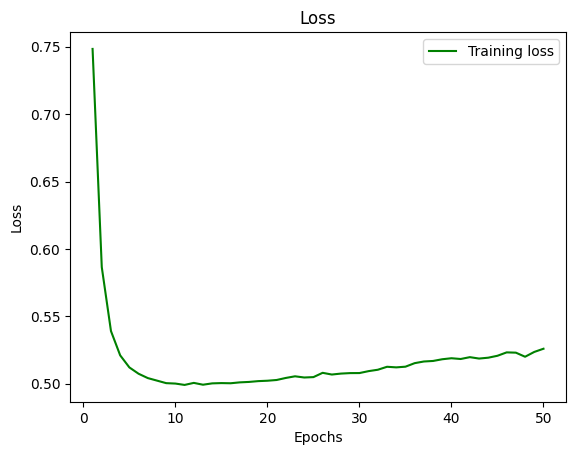

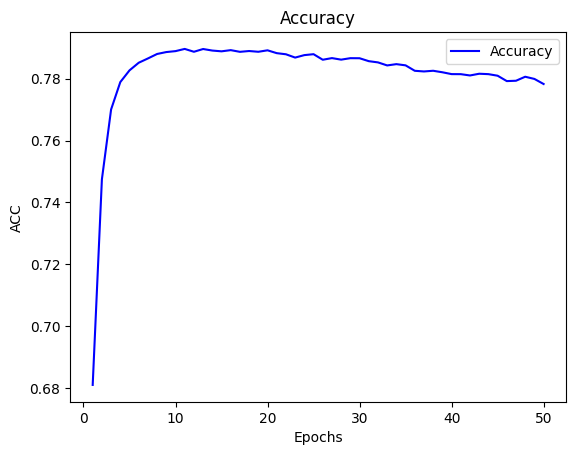

In [179]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['accuracy']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs_range, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

## Resultados

Tras obtener el entrenamiento final con sus resultados en el conjunto de test podemos procedemos a visualizar la arquitectura final del modelo

In [180]:
# Plotting ANN architecture
from ann_visualizer.visualize import ann_viz
from IPython.display import IFrame

ann_viz(final_model, view=True, filename='construct_model', title='ANN_Simple_Architecture')
IFrame("./construct_model.pdf", width=980, height=400)


The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}
The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}


<br>

**Métricas de rendimiento en el modelo final**

Accuracy en los datos de testing para el modelo final

In [181]:
# Predictions and model evaluation in test set

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
#rounded_y_pred_test = [round(x[0]) for x in y_pred_test] # for binary
y_classes = y_pred_test.argmax(axis=-1)
scores_test = model.evaluate(x_test, np_utils.to_categorical(y_test))
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

6524/6524 [==============================] - 3s 420us/step - loss: 0.5196 - accuracy: 0.7796
Accuracy con test: 
accuracy: 77.96%


Matriz de confusión para el modelo final para observar su exactitud

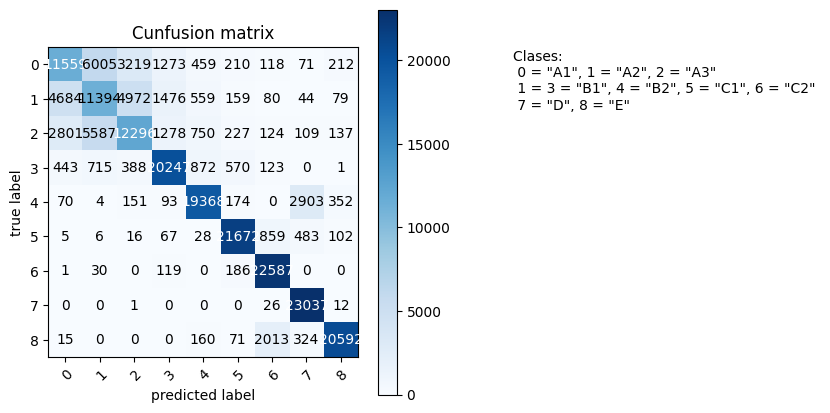

In [187]:
labels=[0, 1, 2, 3, 4, 5, 6, 7, 8]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, y_classes, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1", 1 = "A2", 2 = "A3" \n 1 = 3 = "B1", 4 = "B2", 5 = "C1", 6 = "C2" \n 7 = "D", 8 = "E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()

In [188]:
from sklearn.metrics import f1_score

# Curva ROC

# FP, FN, TP and TN for each class
FP = confMatrix.sum(axis=0) - np.diag(confMatrix)  
FN = confMatrix.sum(axis=1) - np.diag(confMatrix)
TP = np.diag(confMatrix)
TN = sum(list(confMatrix.ravel())) - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate for each class
sensibilidad = TP/(TP+FN)
# Specificity or true negative rate for each class
especificidad = TN/(TN+FP) 
# Precision or positive predictive value for each class
precision = TP/(TP+FP)   

printmd(f'**sensibilidad:** {sensibilidad}')
printmd(f'**especificidad:** {especificidad}')
printmd(f'**precision:** {precision}')

#sensibilidad = round(sum(sensibilidad)/len(sensibilidad), 3)
#especificidad = round(sum(especificidad)/len(especificidad), 3)
#precision = round(sum(precision)/len(precision), 3)


# f1 score
f1_score = round(f1_score(y_test, y_classes, average='micro'),3)

printmd(f'**f1_score:** {f1_score}')


**sensibilidad:** [0.49982703 0.48594703 0.52752156 0.86677512 0.83789747 0.93261038
 0.98534223 0.99830993 0.88854369]

**especificidad:** [0.95680396 0.93337506 0.95283594 0.97677567 0.98476728 0.99139223
 0.98201189 0.97881438 0.99517762]

**precision:** [0.5904076  0.47992924 0.58432733 0.82462428 0.87258966 0.93136791
 0.87107597 0.85413963 0.95834691]

**f1_score:** 0.78

In [189]:
y_pred_test[1]

array([5.4268345e-02, 6.5610133e-02, 8.1296246e-03, 8.7121052e-01,
       2.0907833e-05, 2.1045496e-04, 4.9875083e-04, 1.7514620e-07,
       5.1105941e-05], dtype=float32)

In [190]:
y_test.astype(int)

array([6, 3, 8, ..., 1, 7, 7])

In [191]:
# roc curve

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, np.amax(y_pred_test, axis=1))


roc = roc_auc_score(y_test.astype(int), y_pred_test, multi_class='ovr')

printmd(f'**Área bajo la curva:** {roc}')

**Área bajo la curva:** 0.9704683149594112

### Relaciones en resultados

In [60]:
total_predictions_len = len(y_classes)

Para poder representar las relaciones entre algunas variables y las predicciones generadas por el modelo requerimos crear un dataframe exclusivo con las entradas de los test y sus predicciones.

In [61]:
plot_predictions_df = test[['SEXO','NIVEL DE  ESTUDIOS', '# CARGAS', 'TIPO DE VIVIENDA', 'ESTADO CIVIL']].copy()
plot_predictions_df['CALIFICAC'] = y_classes[:]
plot_predictions_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 75983 entries, 108237 to 234705
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SEXO                75983 non-null  int64
 1   NIVEL DE  ESTUDIOS  75983 non-null  int64
 2   # CARGAS            75983 non-null  int64
 3   TIPO DE VIVIENDA    75983 non-null  int64
 4   ESTADO CIVIL        75983 non-null  int64
 5   CALIFICAC           75983 non-null  int64
dtypes: int64(6)
memory usage: 4.1 MB


Ahora que tenemos un dataframe con la información requerida se harán las busquedas necesarias para generar las  agrupaciones para obtener los procentajes respectivos

#### Relación calificación vs sexo

In [62]:
# Group and create info for plotting

# SEXO VS CALIFICACIÓN
mujeres_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

mujeres_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

mujeres_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


hombres_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

hombres_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

hombres_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['SEXO'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

mujeres_calificacion = [mujeres_calific_0, mujeres_calific_1, mujeres_calific_2]
mujeres_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), mujeres_calificacion))
hombres_calificacion = [hombres_calific_0, hombres_calific_1, hombres_calific_2]
hombres_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), hombres_calificacion))

print(mujeres_calificacion)
print(hombres_calificacion)

[14.82, 13.6, 6.75]
[16.63, 20.05, 28.16]


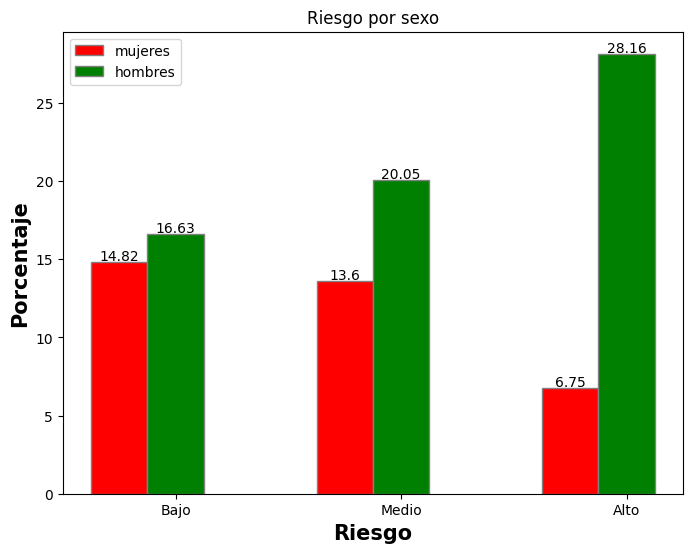

In [178]:
# Set width of bar
barWidth = 0.25

def add_labels(x,y,ini=0):
    for i in range(len(x)):
        plt.text(i+(ini*barWidth), y[i]+0.1, y[i], ha = 'center')
        
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
mujeres = mujeres_calificacion
hombres = hombres_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, mujeres, color ='r', width = barWidth,
        edgecolor ='grey', label ='mujeres')
add_labels(br1, mujeres,0)
plt.bar(br2, hombres, color ='g', width = barWidth,
        edgecolor ='grey', label ='hombres')
add_labels(br2, hombres,1)


# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(mujeres))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por sexo')
plt.legend()
plt.show()

#### Relación calificación vs nivel de educación

In [64]:
# Nivel educación VS CALIFICACIÓN

# sin estudios o primaria
primaria_sin_estu_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

primaria_sin_estu_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

primaria_sin_estu_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

# secundario o técnico

secundario_tecnico_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

secundario_tecnico_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

secundario_tecnico_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

# postgrado o universitario

postgrado_universitaria_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

postgrado_universitaria_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

postgrado_universitaria_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['NIVEL DE  ESTUDIOS'] == 2) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

nivel_estudios_bajo = [primaria_sin_estu_calific_0, primaria_sin_estu_calific_1, primaria_sin_estu_calific_2]
nivel_estudios_bajo = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_bajo))

nivel_estudios_medio = [secundario_tecnico_calific_0, secundario_tecnico_calific_1, secundario_tecnico_calific_2]
nivel_estudios_medio = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_medio))

nivel_estudios_alto = [postgrado_universitaria_calific_0, postgrado_universitaria_calific_1, postgrado_universitaria_calific_2]
nivel_estudios_alto = list(map(lambda x: round(x/total_predictions_len*100,2), nivel_estudios_alto))

print(nivel_estudios_bajo)
print(nivel_estudios_medio)
print(nivel_estudios_alto)

[15.76, 17.25, 26.79]
[13.11, 13.53, 8.11]
[2.57, 2.87, 0.0]


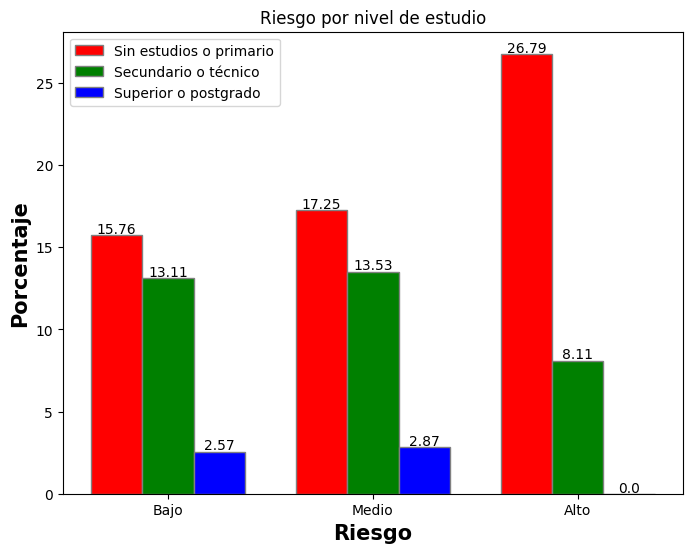

In [179]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
estudios_bajo = nivel_estudios_bajo
estudios_medio = nivel_estudios_medio
estudios_alto = nivel_estudios_alto
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]
br3 = [x + 0.25 for x in br2]

# Make the plot
plt.bar(br1, estudios_bajo, color ='r', width = barWidth,
        edgecolor ='grey', label ='Sin estudios o primario')
add_labels(br1, estudios_bajo, 0)

plt.bar(br2, estudios_medio, color ='g', width = barWidth,
        edgecolor ='grey', label ='Secundario o técnico')
add_labels(br2, estudios_medio, 1)

plt.bar(br3, estudios_alto, color ='b', width = barWidth,
        edgecolor ='grey', label ='Superior o postgrado')
add_labels(br3, estudios_alto, 2)

 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(estudios_bajo))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por nivel de estudio')
plt.legend()
plt.show()


#### Relación calificación vs número de cargas

In [66]:
# calificación vs número de cargas

sin_cargas_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

sin_cargas_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

sin_cargas_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


con_cargas_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

con_cargas_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

con_cargas_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['# CARGAS'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

sin_cargas_calificacion = [sin_cargas_calific_0, sin_cargas_calific_1, sin_cargas_calific_2]
sin_cargas_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), sin_cargas_calificacion))
con_cargas_calificacion = [con_cargas_calific_0, con_cargas_calific_1, con_cargas_calific_2]
con_cargas_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), con_cargas_calificacion))

print(sin_cargas_calificacion)
print(con_cargas_calificacion)

[7.77, 7.57, 8.36]
[23.68, 26.09, 26.54]


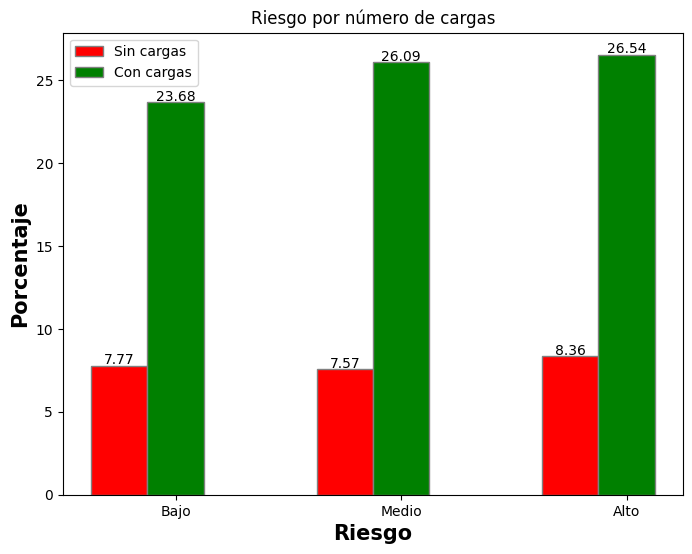

In [180]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
sin_cargas = sin_cargas_calificacion
con_cargas = con_cargas_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(mujeres))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, sin_cargas, color ='r', width = barWidth,
        edgecolor ='grey', label ='Sin cargas')
add_labels(br1, sin_cargas, 0)

plt.bar(br2, con_cargas, color ='g', width = barWidth,
        edgecolor ='grey', label ='Con cargas')
add_labels(br2, con_cargas, 1)
 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(sin_cargas))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por número de cargas')
plt.legend()
plt.show()

#### Relación calificación vs tipo de vivienda

In [68]:
# calificación vs tipo de vivienda
vivienda_propia_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

vivienda_propia_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

vivienda_propia_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


vivienda_no_propia_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

vivienda_no_propia_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

vivienda_no_propia_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['TIPO DE VIVIENDA'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

vivienda_propia_calificacion = [vivienda_propia_calific_0, vivienda_propia_calific_1, vivienda_propia_calific_2]
vivienda_propia_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), vivienda_propia_calificacion))

vivienda_no_propia_calificacion = [con_cargas_calific_0, con_cargas_calific_1, vivienda_no_propia_calific_2]
vivienda_no_propia_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), vivienda_no_propia_calificacion))

print(vivienda_propia_calificacion)
print(vivienda_no_propia_calificacion)

[13.8, 15.75, 14.26]
[23.68, 26.09, 20.65]


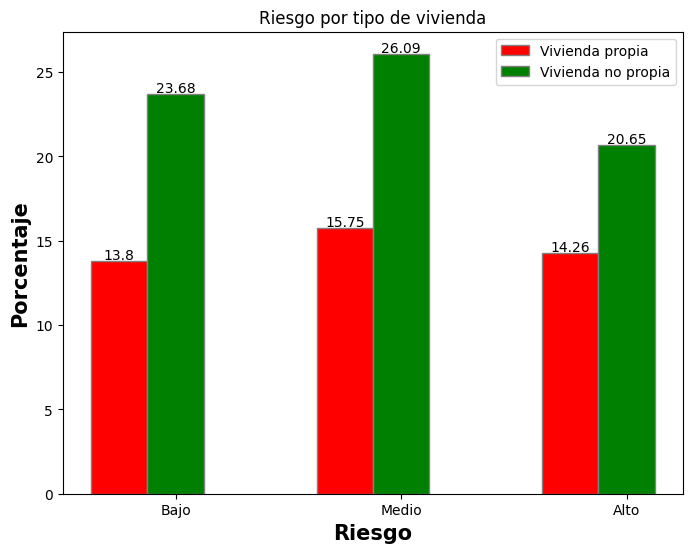

In [181]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
vivienda_propia = vivienda_propia_calificacion
vivienda_no_propia = vivienda_no_propia_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(vivienda_propia))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, vivienda_propia, color ='r', width = barWidth,
        edgecolor ='grey', label ='Vivienda propia')
add_labels(br1, vivienda_propia, 0)

plt.bar(br2, vivienda_no_propia, color ='g', width = barWidth,
        edgecolor ='grey', label ='Vivienda no propia')
add_labels(br2, vivienda_no_propia, 1)
 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(vivienda_propia))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por tipo de vivienda')
plt.legend()
plt.show()

#### Relación calificación vs estado civil

In [70]:
# calificación vs estado civil

soltero_union_libre_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

soltero_union_libre_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

soltero_union_libre_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 0) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])


casado_divorciado_viudo_calific_0 = len(plot_predictions_df.loc[ 
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 0) 
                    ])

casado_divorciado_viudo_calific_1 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 1)
                    ])

casado_divorciado_viudo_calific_2 = len(plot_predictions_df.loc[
                        (plot_predictions_df['ESTADO CIVIL'] == 1) & (plot_predictions_df['CALIFICAC'] == 2)
                    ])

soltero_union_libre_calificacion = [soltero_union_libre_calific_0, soltero_union_libre_calific_1, soltero_union_libre_calific_2]
soltero_union_libre_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), soltero_union_libre_calificacion))

casado_divorciado_viudo_calificacion = [casado_divorciado_viudo_calific_0, casado_divorciado_viudo_calific_1, casado_divorciado_viudo_calific_2]
casado_divorciado_viudo_calificacion = list(map(lambda x: round(x/total_predictions_len*100,2), casado_divorciado_viudo_calificacion))

print(soltero_union_libre_calificacion)
print(casado_divorciado_viudo_calificacion)

[13.25, 12.37, 10.74]
[18.19, 21.28, 24.16]


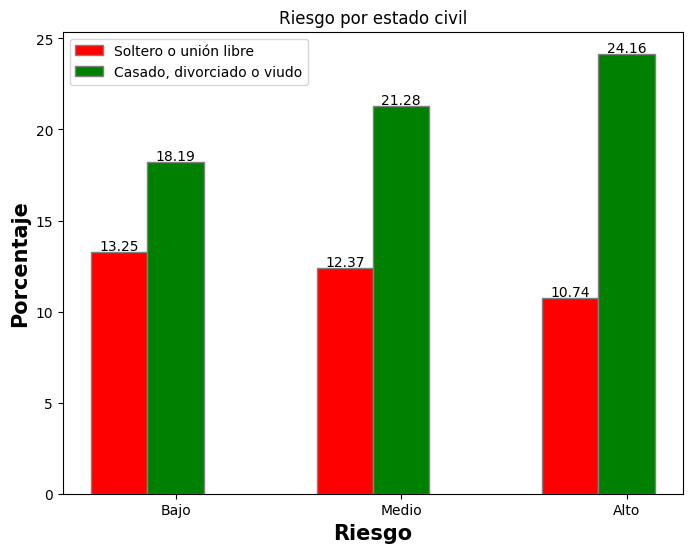

In [183]:
# Set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 6))
 
# set height of bar
soltero_union_libre = soltero_union_libre_calificacion
casado_divorciado_viudo = casado_divorciado_viudo_calificacion
 
# Set position of bar on X axis
br1 = np.arange(len(soltero_union_libre))
br2 = [x + 0.25 for x in br1]

# Make the plot
plt.bar(br1, soltero_union_libre, color ='r', width = barWidth,
        edgecolor ='grey', label ='Soltero o unión libre')
add_labels(br1, soltero_union_libre, 0)

plt.bar(br2, casado_divorciado_viudo, color ='g', width = barWidth,
        edgecolor ='grey', label ='Casado, divorciado o viudo')
add_labels(br2, casado_divorciado_viudo, 1)
 
# Adding Xticks
plt.xlabel('Riesgo', fontweight ='bold', fontsize = 15)
plt.ylabel('Porcentaje', fontweight ='bold', fontsize = 15)
plt.xticks([x + barWidth for x in range(len(soltero_union_libre))],
        ['Bajo', 'Medio', 'Alto',])

plt.title('Riesgo por estado civil')
plt.legend()
plt.show()